## Getting started

Music21 encapsulates most concepts from music theory in some kind of object. There are pitches, notes intervals chords. Melodies are created by packing notes and chords into stream objects and all the objects come with handy methods to modify them or create related new objects.

Because there are a bunch of different classes it is best to import then all in the first line:

In [1]:
from music21 import *

Creating a note is very easy. It's just a `Note` object from the `note` submodule. You could create it with a `Pitch` object but music21 has short string notations which are very easy: `'C4'` simply creates a C in the fourth octave, the base note of the C major scale. If no duration is given music21 assumes a quarter note but the `quarterLength` parameter sets it right in the constructor. The method `.show()` creates a PNG image of the nostation an the jupyter notebook displadys it directly beneath the cell.

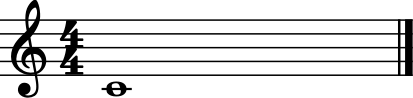

In [2]:
c = note.Note('C4', quarterLength=4)
c.show()

music21 can also create a midi version of the object. You can unse the embedded player to play it inside of the notebook.

In [3]:
c.show('midi')

## Creating a random chord sequence

By transposing the base note along the intervals major third `M3`, minor third `m3` and perfect fith `P5` one can create chords. Building a random sequence out of these creates a first algorithmic composition.

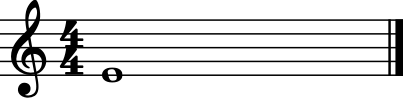

In [4]:
e = c.transpose('M3')
e.show()

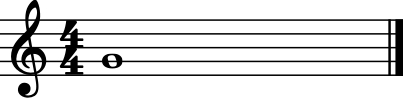

In [5]:
g = e.transpose('m3')
g.show()

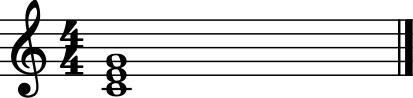

In [6]:
c_dur = chord.Chord([c, e, g])
c_dur.show()

In [7]:
c_dur.show('midi')

In [8]:
from enum import Enum
class MajorMinor(Enum):
    MAJOR = 1
    MINOR = 0

In [9]:
def build_chord(base_tone: note.Note, major_minor: MajorMinor = MajorMinor.MAJOR):
    intervals = ('M3', 'm3') if major_minor == MajorMinor.MAJOR else ('m3', 'M3')
    second_tone = base_tone.transpose(intervals[0])
    third_tone = second_tone.transpose(intervals[1])
    return chord.Chord([base_tone, second_tone, third_tone])

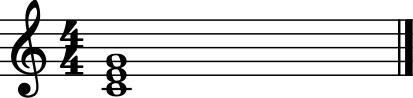

In [10]:
c_dur = build_chord(c, MajorMinor.MAJOR)
c_dur.show()

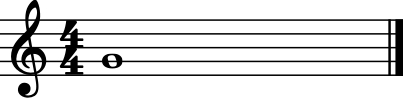

In [11]:
g = c.transpose('P5')
g.show()

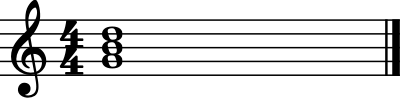

In [12]:
g_dur = build_chord(g, MajorMinor.MAJOR)
g_dur.show()

In [13]:
stream.Stream([c_dur, g_dur]).show('midi')

5


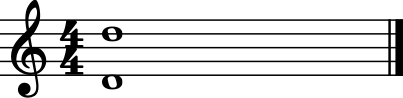

In [14]:
d2 = g.transpose('P5')
print(d2.octave)
d1 = note.Note('D4', quarterLength=4)
chord.Chord([d1, d2]).show()

In [15]:
def transpose_to_fourth_octave(note: note.Note):
    while note.octave > 4:
        note = note.transpose('P-8')
    while note.octave < 4:
        note = note.transpose('P8')
    return note

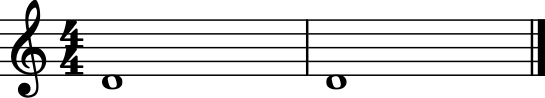

In [16]:
stream.Stream([d1, transpose_to_fourth_octave(d2)]).show()

In [17]:
from random import choice
def create_random_chord_stream(length, note_length=2):
    directions = [(MajorMinor.MAJOR, 'P-5'), (MajorMinor.MINOR, 'P-5'), 
                  (MajorMinor.MAJOR, 0), (MajorMinor.MINOR, 0), 
                  (MajorMinor.MAJOR, 'P5'), (MajorMinor.MINOR, 'P5')]
    major_minor = choice((MajorMinor.MAJOR, MajorMinor.MINOR))
    last_chord = build_chord(note.Note('C4', quarterLength=note_length), major_minor)
    s = stream.Stream()
    for i in range(length):
        changing_directions = directions.copy()
        changing_directions.pop(directions.index((major_minor, 0)))
        direction = choice(changing_directions)
        new_chord = build_chord(transpose_to_fourth_octave(
            last_chord.notes[0].transpose(direction[1])), direction[0])
        s.append(new_chord)
        last_chord = new_chord
        major_minor = direction[0]
    return s

(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MAJOR: 1>, 0)
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MINOR: 0>, 0)
(<MajorMinor.MAJOR: 1>, 0)
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MINOR: 0>, 0)
(<MajorMinor.MAJOR: 1>, 0)
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MINOR: 0>, 'P5')


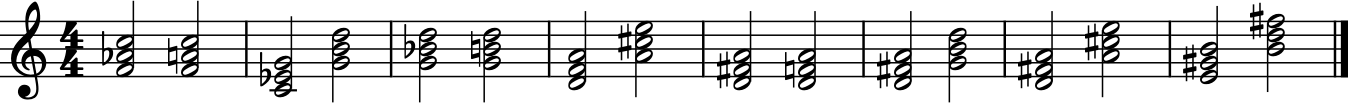

In [18]:
chord_stream = create_random_chord_stream(16)
chord_stream.show()

In [ ]:
chord_stream.show('midi')

(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MINOR: 0>, 0)
(<MajorMinor.MAJOR: 1>, 0)
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MAJOR: 1>, 0)
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MINOR: 0>, 0)
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MINOR: 0>, 0)
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MAJOR: 1>, 0)
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MAJOR: 1>, 0)
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.M

## Chord inversions

By transposing some notes of a chord a full octave inversions of the chord are created. These can sound lower than the previous chord even if the base tone of the chord is a fith higher.